In [21]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json

In [22]:
api_key = "78c184623c158a6c5e2bb02d2c49a9f4a541b8be"
url = "https://api.census.gov/data/2022/acs/acs5?get=NAME,B01001_001E&for=county:*&in=state:*&key={api_key}"

In [23]:
with open("/Users/Lexi/Documents/umich/courses/Winter24/si507/projects/final_project/acs2022_1yr_B15002_04000US21/acs2022_1yr_B15002_04000US21.geojson") as f:
    data = json.load(f)

gdf = pd.json_normalize(data, 'features')
gdf.head()

,type,properties.geoid,properties.name,properties.B15002001,"properties.B15002001, Error",properties.B15002002,"properties.B15002002, Error",properties.B15002003,"properties.B15002003, Error",properties.B15002004,...,properties.B15002032,"properties.B15002032, Error",properties.B15002033,"properties.B15002033, Error",properties.B15002034,"properties.B15002034, Error",properties.B15002035,"properties.B15002035, Error",geometry.type,geometry.coordinates
0,Feature,04000US01,Alabama,3474924.0,5963.0,1648857.0,5031.0,24894.0,2625.0,4074.0,...,324160.0,9372.0,172184.0,6916.0,29090.0,3114.0,18891.0,2155.0,MultiPolygon,"[[[[-85.127329, 31.762563], [-85.12753, 31.762..."
1,Feature,04000US02,Alaska,489218.0,1732.0,257837.0,1453.0,2336.0,725.0,798.0,...,49622.0,3511.0,21076.0,1968.0,4538.0,1042.0,3247.0,902.0,MultiPolygon,"[[[[-179.230233, 51.283927], [-179.225686, 51...."
2,Feature,04000US04,Arizona,5053656.0,3052.0,2497572.0,2431.0,46443.0,4866.0,10306.0,...,518736.0,12755.0,253997.0,8291.0,43428.0,3477.0,32926.0,3033.0,MultiPolygon,"[[[[-110.75069, 37.003007], [-110.741926, 37.0..."
3,Feature,04000US05,Arkansas,2057624.0,5056.0,994980.0,4656.0,16135.0,2091.0,4110.0,...,178445.0,5726.0,87684.0,5516.0,12300.0,1841.0,10275.0,1715.0,MultiPolygon,"[[[[-90.955771, 34.118713], [-90.954514, 34.11..."
4,Feature,04000US06,California,26866772.0,6486.0,13302771.0,5475.0,493651.0,11272.0,161018.0,...,3156785.0,29261.0,1418037.0,20728.0,339833.0,8673.0,221392.0,8454.0,MultiPolygon,"[[[[-119.999866, 41.183974], [-119.999874, 41...."


In [24]:
df = pd.read_excel("/Users/Lexi/Documents/umich/courses/Winter24/si507/projects/final_project/dia_lbls_all_overall_state_2022_02_14Sep2023.xlsx")
df.head()

,State FIPS,State Name,State Abbreviation,"Share with any debt in collections, All","Share with any debt in collections, Comm of color","Share with any debt in collections, White comm","Median debt in collections, All","Median debt in collections, Comm of color","Median debt in collections, White comm","Share with medical debt in collections, All",...,"Credit card debt delinquency rate, All","Credit card debt delinquency rate, Comm of color","Credit card debt delinquency rate, White comm","Median credit card delinquent debt, All","Median credit card delinquent debt, Comm of color","Median credit card delinquent debt, White comm",Share of people of color,"Average household income, All","Average household income, Comm of color","Average household income, White comm"
0,1,Alabama,AL,0.337288,0.493920,0.291345,1798.0,1903.0,1740.0,0.164056,...,0.046872,0.084547,0.037886,378.0,352.0,405.0,0.358467,75922.77,57844.20,85041.99
1,2,Alaska,AK,0.167243,0.221394,0.144704,1867.5,1523.0,2010.0,0.038780,...,0.024422,0.037283,0.021201,517.5,NaN,623.0,0.421099,100518.60,86380.38,107464.90
2,4,Arizona,AZ,0.266694,0.387210,0.198420,1903.0,1897.0,1901.0,0.124015,...,0.034139,0.056374,0.024677,441.0,378.0,466.0,0.479919,93177.19,78715.77,102244.90
3,5,Arkansas,AR,0.346579,0.506618,0.317895,1553.0,1665.0,1520.0,0.177830,...,0.051266,0.092141,0.046687,407.0,305.5,430.0,0.317777,73125.69,59729.54,78277.63
4,6,California,CA,0.208771,0.244169,0.146847,1824.0,1856.0,1629.0,0.077583,...,0.027178,0.033502,0.018009,453.0,430.0,534.0,0.657429,120952.80,107349.50,138392.90


In [25]:
merged_df = pd.merge(gdf, df, left_on='properties.name', right_on='State Name')
merged_df.head()

,type,properties.geoid,properties.name,properties.B15002001,"properties.B15002001, Error",properties.B15002002,"properties.B15002002, Error",properties.B15002003,"properties.B15002003, Error",properties.B15002004,...,"Credit card debt delinquency rate, All","Credit card debt delinquency rate, Comm of color","Credit card debt delinquency rate, White comm","Median credit card delinquent debt, All","Median credit card delinquent debt, Comm of color","Median credit card delinquent debt, White comm",Share of people of color,"Average household income, All","Average household income, Comm of color","Average household income, White comm"
0,Feature,04000US01,Alabama,3474924.0,5963.0,1648857.0,5031.0,24894.0,2625.0,4074.0,...,0.046872,0.084547,0.037886,378.0,352.0,405.0,0.358467,75922.77,57844.20,85041.99
1,Feature,04000US02,Alaska,489218.0,1732.0,257837.0,1453.0,2336.0,725.0,798.0,...,0.024422,0.037283,0.021201,517.5,NaN,623.0,0.421099,100518.60,86380.38,107464.90
2,Feature,04000US04,Arizona,5053656.0,3052.0,2497572.0,2431.0,46443.0,4866.0,10306.0,...,0.034139,0.056374,0.024677,441.0,378.0,466.0,0.479919,93177.19,78715.77,102244.90
3,Feature,04000US05,Arkansas,2057624.0,5056.0,994980.0,4656.0,16135.0,2091.0,4110.0,...,0.051266,0.092141,0.046687,407.0,305.5,430.0,0.317777,73125.69,59729.54,78277.63
4,Feature,04000US06,California,26866772.0,6486.0,13302771.0,5475.0,493651.0,11272.0,161018.0,...,0.027178,0.033502,0.018009,453.0,430.0,534.0,0.657429,120952.80,107349.50,138392.90


In [26]:
merged = pd.read_excel("/Users/Lexi/Documents/umich/courses/Winter24/si507/projects/final_project/acs2022_1yr_B15002_04000US21/merged_dataframe.xlsx")
numerical_merged = merged.iloc[:,3:]
numerical_merged.head()
df_transposed = numerical_merged.T
df_transposed.head()
cor_matrix = df_transposed.corr()
cor_matrix.head()

df3 = pd.DataFrame(cor_matrix)

# Save the dataframe to a CSV file
df3.to_csv('final_cor_matrix.csv', index=False)

In [27]:
stocks = cor_matrix.index.values
cor_matrix = np.asmatrix(cor_matrix)

In [28]:
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_array(cor_matrix)

# Relabel the nodes to match the stock names
# Creating a dictionary where the keys are the original node numbers and the values are the stock names
mapping = {i: stock for i, stock in enumerate(stocks)}
G = nx.relabel_nodes(G, mapping)

# Show the first 5 edges with their corresponding weights
first_five_edges = list(G.edges(data=True))[:5]
print(first_five_edges)


[(0, 0, {'weight': 1.0}), (0, 1, {'weight': 0.9669294799903765}), (0, 2, {'weight': 0.9986645574535516}), (0, 3, {'weight': 0.9993680121710284}), (0, 4, {'weight': 0.9969588204344785})]


In [33]:
def create_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.circular_layout(G)

    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)

    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8,
                            font_family='sans-serif')

    #draws the edges
    nx.draw_networkx_edges(G, positions,style='solid')

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part1.png", format="PNG")
    plt.show()

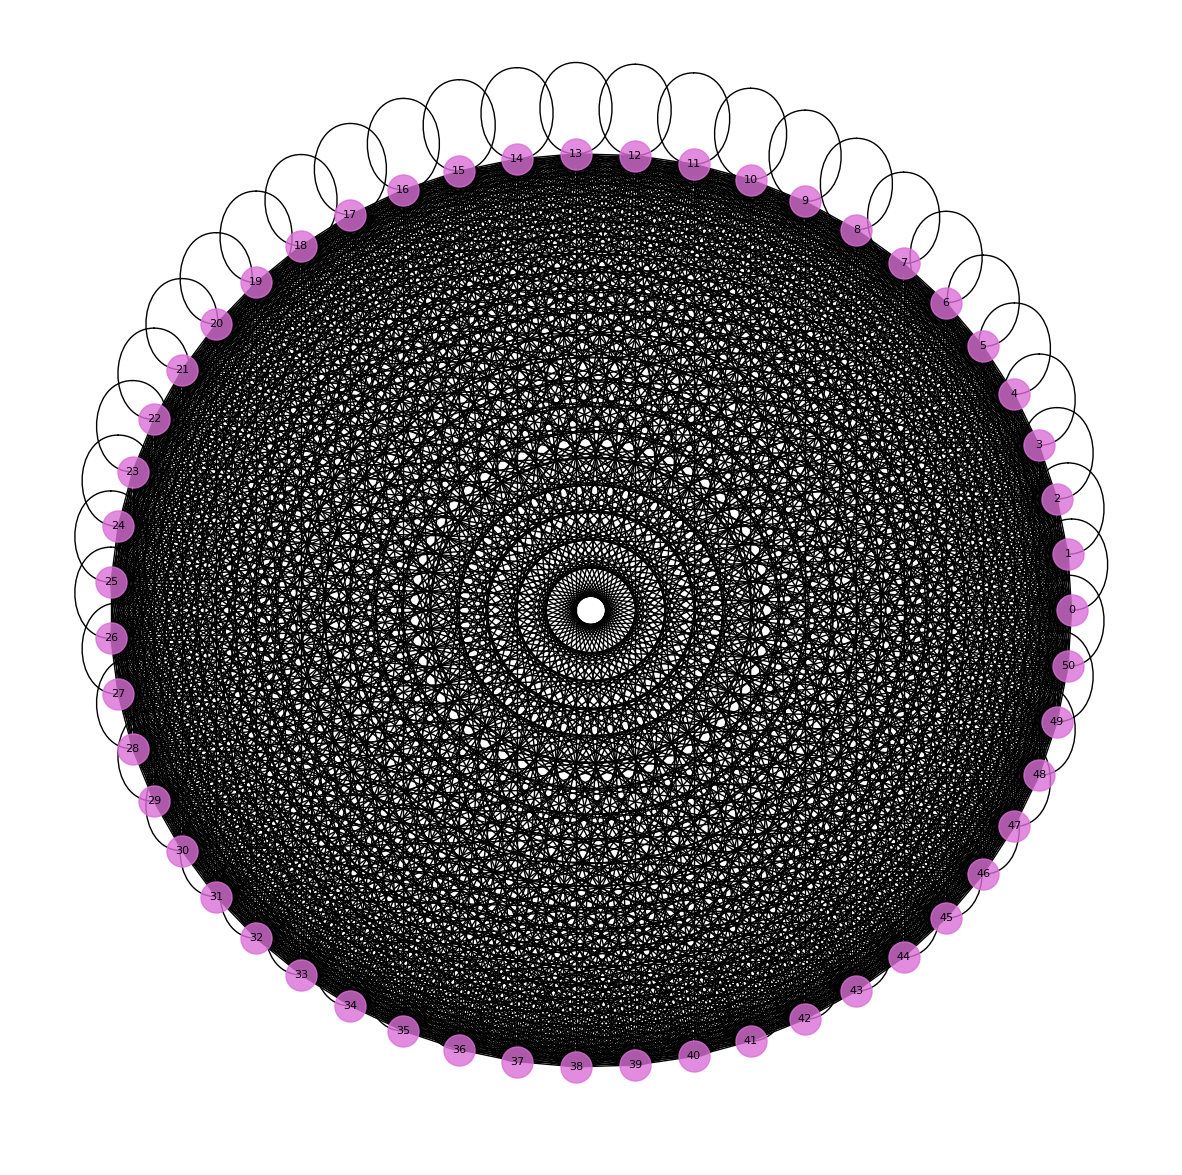

In [34]:
create_corr_network_1(G)

In [35]:
def create_corr_network_2(G, corr_direction):
    ##Creates a copy of the graph
    H = G.copy()

    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges_iter(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0
        if corr_direction == "positive":
            if weight["weight"] <0:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            if weight["weight"] >=0:
                H.remove_edge(stock1, stock2)


    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())

    #positions
    positions=nx.circular_layout(H)

    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)

    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8,
                            font_family='sans-serif')

    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid')

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part2" + corr_direction + ".png", format="PNG")
    plt.show()

In [36]:
create_corr_network_2(G,corr_direction="positive")

AttributeError: 'Graph' object has no attribute 'edges_iter'